## Introduction to Machine Learning, Lab 4

### Kernels and Support Vector Machines

### Exercise I. Concentric data

#### Exercise I.1. Defining the kernel. 

Consider the simple dataset below. We want to learn a discriminant for this dataset that would separate the red from the blue class. To do this, start by completing the function 'GaussianKernel' below that should return the value of the Gaussian kernel for two inputs x and y.

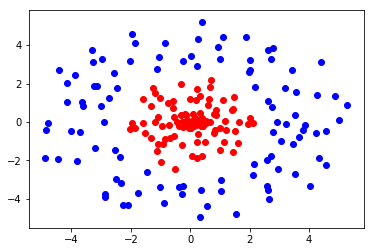

In [36]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np


numberSamples_circle = 20
numberSamples_radius = 5


radius1 = 2
radius2 = 5

col = 0

X1 = np.zeros((numberSamples_circle,numberSamples_radius))
Y1 = np.zeros((numberSamples_circle,numberSamples_radius))
separation = 1

for radius11 in np.linspace(0,radius1,numberSamples_radius):
    
    angle = np.linspace(0,2*np.pi,numberSamples_circle)+ np.random.normal(0,.1,numberSamples_circle)

    X1[:,col] = radius11*np.cos(angle) + np.random.normal(0,.2,np.shape(X1)[0])
    Y1[:,col] = radius11*np.sin(angle)+ np.random.normal(0,.2,np.shape(Y1)[0])
    col+=1
    
    
X2 = np.zeros((numberSamples_circle,numberSamples_radius))
Y2 = np.zeros((numberSamples_circle,numberSamples_radius))

col = 0

for radius22 in np.linspace(radius1+separation,radius2,numberSamples_radius):
    
    angle = np.linspace(0,2*np.pi,numberSamples_circle)+ np.random.normal(0,.1,numberSamples_circle)

    X2[:,col] = radius22*np.cos(angle) + np.random.normal(0,.2,np.shape(X2)[0])
    Y2[:,col] = radius22*np.sin(angle)+ np.random.normal(0,.2,np.shape(Y2)[0])
    col+=1
        

    
plt.scatter(X1.flatten(), Y1.flatten(), c='r')
plt.scatter(X2.flatten(), Y2.flatten(), c='b')

plt.show()




In [ ]:
def GaussianKernel(x, y):
    
    '''Given two points x and y, the function should return the value of the 
    Gaussian kernel at (x, y)'''
    
    
    
    
    
    return valueKernel
    

#### Exercise 2.  Kernel trick and classifier

Now that we have the kernel, we want to learn the classifier. We consider the ridge regularized $\ell_2$ loss. 

$$\ell(\beta) = \sum_{i=1}^N \left|t^{(i)} - \left(\beta_0 + \sum_{j=1}^D \beta_j \phi(X^{(i)})_j\right)\right|^2 + \lambda \|\boldsymbol{\beta}\|^2$$

By using the kernel trick, we can write this objective as a function of the Kernel instead of the feature vectors $\phi(X)$. Start by computing the derivative of the loss with respect to w to recover the expression 

$$\boldsymbol{\beta} = -\frac{1}{\lambda} \sum_{i=1}^N \left(\boldsymbol{\beta}^T\phi(X^{(i)}) - t^{(i)}\right)\phi(X^{(i)})$$ 

We then encode the factors $\left(\boldsymbol{\beta}^T\phi(X^{(i)}) - t^{(i)}\right)$ in the scalars $a_i$ as $a_i = \left(\boldsymbol{\beta}^T\phi(X^{(i)}) - t^{(i)}\right)$. 

Substitute this expression for $\boldsymbol{\beta}$ in the loss above, to obtain an expression that only depends on $\boldsymbol{a}$. Show that you get a loss of the form 

$$J(\boldsymbol{a}) = \frac{1}{2}\boldsymbol{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\boldsymbol{a} - \boldsymbol{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\boldsymbol{t} + \frac{1}{2}\boldsymbol{t}^T\boldsymbol{t} + \frac{\lambda}{2}\boldsymbol{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\boldsymbol{a}$$

##### Exercise 2.1 

Use $\boldsymbol{\Phi}\boldsymbol{\Phi}^T = \boldsymbol{K}$ and solve the resulting loss through Gradient descent.

##### Exercise 2.2 

Just as we used the Normal equations to obtain a closed form expression for $\boldsymbol{\beta}$, you can get set the derivative of $\ell(\boldsymbol{a})$ to get a closed form expression for this vector. Do this below.

##### Exercise 2.3

Display your classifier using meshgrid 